In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.drop(["User ID"], axis = 1, inplace = True)

In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
df = pd.get_dummies(df, drop_first = True)

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased,Gender_Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


In [11]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
Gender_Male        uint8
dtype: object

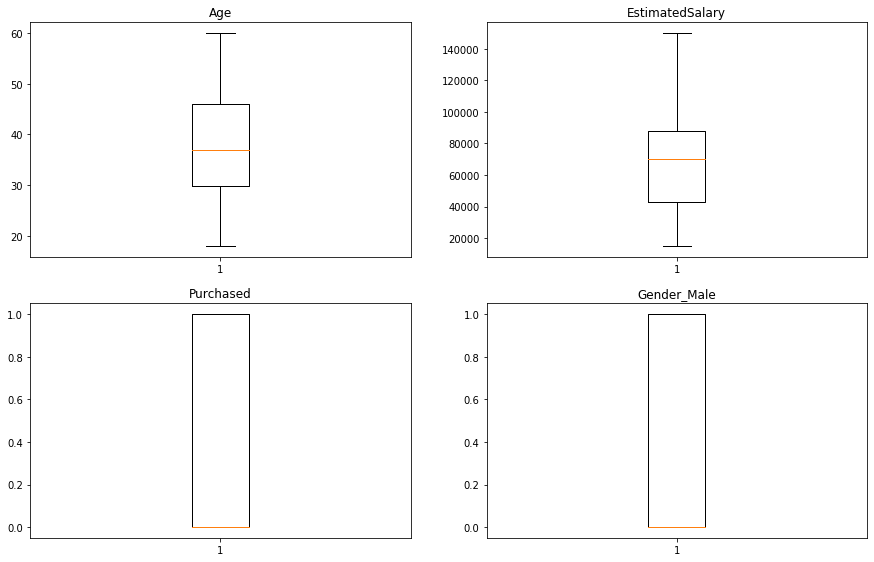

In [12]:
# checking outliers in each features
plt.figure(figsize = (15,25))
count = 1
for col in df:
    if(df[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,df[col].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1
        
plt.show()

In [13]:
X = df.loc[:, ["Age","EstimatedSalary","Gender_Male"]].values
y = df.loc[: , ["Purchased"]].values

In [14]:
print(X, y, X.shape, y.shape)

[[   19 19000     1]
 [   35 20000     1]
 [   26 43000     0]
 ...
 [   50 20000     0]
 [   36 33000     1]
 [   49 36000     0]] [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0

In [15]:
# checking Each value Count
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [16]:
# Splitting in to Training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 3) (80, 3) (320, 1) (80, 1)


In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Model Building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

C:\Users\sambi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# predictions
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
cfm_matrix = confusion_matrix(y_test,y_pred)
cfm_matrix

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [24]:
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

Accuracy Score :  0.9125
